# Example: Multi-Input-Multi-Output Systems (MIMO)

Consider the dynamical system

$$
\begin{pmatrix}
\dot{x}_{1}(t) \\
\dot{x}_{2}(t)
\end{pmatrix}
= 
\begin{pmatrix}
3 & 1 \\
2 & 2
\end{pmatrix} 
~
\begin{pmatrix}
x_{1}(t) \\
x_{2}(t)
\end{pmatrix}
+
\begin{pmatrix}
2 & 2 \\
3 & 1
\end{pmatrix} 
~
\begin{pmatrix}
u_{1}(t) \\
u_{2}(t)
\end{pmatrix}
$$

## Stability

The Eigenvalues of the uncontrolled system 

$$
\begin{pmatrix}
\dot{x}_{1} \\
\dot{x}_{2}
\end{pmatrix}
= 
\begin{pmatrix}
3 & 1 \\
2 & 2
\end{pmatrix} 
~
\begin{pmatrix}
x_{1} \\
x_{2}
\end{pmatrix}
$$

are calculated with

$$
\det \left(A - \lambda I\right) =
\det
\begin{pmatrix}
3 - \lambda & 1 \\
2 & 2 - \lambda
\end{pmatrix} 
= \lambda^2 - 5 \lambda + 4 = 0 
$$

The uncontrolled system is unstable because its Eigenvalues are $ \lambda_{1} = 1.0 $ and $ \lambda_{2} = 4.0 $.

In [1]:
using LinearAlgebra

A = [3 1; 2 2]; # State matrix
evals = eigvals(A) # Eigenvalues

2-element Array{Float64,1}:
 1.0
 4.0

The associated (right) Eigenvectors are calculated with 

$$
\left(A - \lambda_{i} I\right) v = 
\begin{pmatrix}
3 - \lambda_{i} & 1 \\
2 & 2 - \lambda_{i}
\end{pmatrix} 
\begin{pmatrix}
v_{i,1} \\
v_{i,2}
\end{pmatrix} 
=
\begin{pmatrix}
0 \\
0
\end{pmatrix} 
$$

for $\lambda_{1}$ and $\lambda_{2}$ and thus, one yields 
$$
v_{1} = 
\begin{pmatrix}
1 \\
-2
\end{pmatrix} 
\quad \text{and} \quad
v_{2} = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$


In [2]:
evecs = eigvecs(A) # Scaled/normalized Eigenvectors

2×2 Array{Float64,2}:
 -0.447214  0.707107
  0.894427  0.707107

**Remark**: The computed Eigenvectors above are scaled/normalized with 

$$
\overline{v} = \frac{v}{\lVert v\rVert} =  \frac{v}{ \sqrt{ v_{i,1}^2 + v_{i,2}^2}} 
$$

## Decoupling the system

The number of Eigenvalues and Eigenvectors are identical which means the geometrical and algebraical multiplicity are equal. Therefore, the MIMO system can be completely decoupled with

$$
M = [v_{1}, v_{2}] =
\begin{pmatrix}
1 & 1 \\
-2 & 1
\end{pmatrix}
\quad \text{,} \quad
A_{M} = 
\begin{pmatrix}
\lambda_{1} & 0 \\
0 & \lambda_{2}
\end{pmatrix} 
$$
and
$$
A_{M} = 
\begin{pmatrix}
1 & 0 \\
0 & 4
\end{pmatrix} 
=
\begin{pmatrix}
1 & 1 \\
-2 & 1
\end{pmatrix}^{-1}
~
\begin{pmatrix}
3 & 1 \\
2 & 2
\end{pmatrix} 
~
\begin{pmatrix}
1 & 1 \\
-2 & 1
\end{pmatrix}
= M^{-1} A M  \text{.}
$$

The differential equation $ \dot{x} = A x + B u $ is transformed with $ x = M x_{M} $ to

$$
\dot{x}_{M}(t) = M^{-1} A M ~ x_{M}(t) + M^{-1} B ~ u = A_{M} x_{M}(t) + w(t)
$$

with the new input $ w(t) = M^{-1} B ~ u$. 

## Controller design

The decoupled MIMO system has the form

$$
\dot{x}_{M,1}(t) = 1~x_{M,1}(t) + w_{1}(t) \\
\dot{x}_{M,2}(t) = 4~x_{M,2}(t) + w_{2}(t)
$$

with state feedback $ w_{i}(t) = -K_{M,i} ~ x_{M,i}(t) $. The desired Eigenvalues (here $\lambda_{d,1} = -1$ and $\lambda_{d,2} = -3$) can be specified directly with

$$
\dot{x}_{M,1}(t) = 1~x_{M,1}(t) - K_{M,1} x_{M,1}(t) = (1 - K_{M,1}) x_{M,1}(t) ~=: \lambda_{d,1}  x_{M,1}(t) \\
\dot{x}_{M,2}(t) = 4~x_{M,2}(t) - K_{M,2} x_{M,2}(t) = (4 - K_{M,2}) x_{M,2}(t) ~=: \lambda_{d,2}  x_{M,2}(t)
$$

and thus one holds

$$
K_{M,1} = 1 - \lambda_{d,1} = 2 \\
K_{M,2} = 4 - \lambda_{d,2} = 7 \text{.}
$$

Therefore, the feedback matrix of the decoupled system is

$$
K_{M} = 
\begin{pmatrix}
2 & 0 \\
0 & 7
\end{pmatrix} \text{.}
$$

Finally, the results of the decoupled system have to be re-transformed to the original system. The identities 

$$
w(t) = M^{-1} B u(t) = -M^{-1} B K ~ x(t) \quad \text{and} \\
w(t) = -K_{M} x_{M}(t) = -K_{M} M^{-1} ~ x(t)
$$

are used to find the **feedback matrix** for original MIMO system

$$
K = B^{-1} M K_{M} M^{-1} \text{.}
$$

In [3]:
B = [2 2; 3 1];   # Input matrix
M = [1 1; -2 1];  # Transformation matrix

K_M = [2 0; 0 7]; # Feedback matrix of decoupled system

# Feedback matrix of the original system
K = inv(B) * M * K_M * inv(M) 

2×2 Array{Float64,2}:
 0.333333   1.41667 
 2.33333   -0.583333

## Closed-loop system

The closed-loop system is stated in general as

$$
\dot{x}(t) = A x(t) + B u(t) = (A - B K) x(t) = A_{CL} x(t)
$$

and applied to this example, one holds

$$
\begin{pmatrix}
\dot{x}_{1}(t) \\
\dot{x}_{2}(t) 
\end{pmatrix}
=
\frac{1}{3}
\begin{pmatrix}
-7 & -2 \\
-4 & -5
\end{pmatrix}
~
\begin{pmatrix}
x_{1}(t) \\
x_{2}(t) 
\end{pmatrix}
$$

In [4]:
Acl = A - B*K # Closed-loop system matrix

2×2 Array{Float64,2}:
 -2.33333  -0.666667
 -1.33333  -1.66667 

The Eigenvalues of the closed-loop system are identical with the desired Eigenvalues.

In [5]:
evals_cl = eigvals(Acl) # Eigenvalues of closed-loop system

2-element Array{Float64,1}:
 -3.0               
 -1.0000000000000004

## Simulation

The closed-loop system is simulated with the initial value $ x_{0} = (1.0, 2.0)^{\top}$ for $t_{final} = 5.0$ seconds.

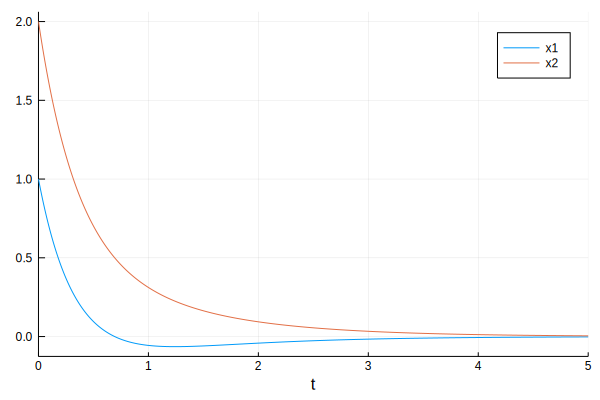

In [6]:
sys_cl(x, p, t) = Acl * x; # Closed-loop dynamical system
x0 = [1.0 , 2.0]; # Initial values
tspan = (0.0, 5.0); # Time range

using DifferentialEquations;
using Plots;

prob = ODEProblem(sys_cl, x0, tspan);
sol = solve(prob); # Solving the ODE

plot(sol, label=["x1" "x2"]) # Solution graph

## Filter matrix design

The system input is extended as

$$
u(t) = -K x(t) + W r(t)
$$

with a filter matrix $ W $ and a reference $ r(t)$. The filter matrix shall be designed such that the system output $y(t)$ follows the reference trajectory. The new input is inserted in the state-space differential equation

$$
\dot{x}(t) = A x(t) + B u(t) = A x(t) - B K x(t) + B W r(t) \\
= (A - B K) ~ x(t) + B W ~ r(t) \text{.}
$$

It is assumed that the system reaches the steady state $ \dot{x}(t) = 0 $ for $ t\rightarrow \infty $ and the system dynamics result in 

$$
0 = (A - B K) ~ x(t) + B W ~ r(t)
$$

which is reformulated as

$$
    x(t) = -(A - B K)^{-1} ~ B W ~ r(t) \text{.}
$$

System output is stated as 

$$
y(t) = C x(t) = -C (A - B K)^{-1} ~ B W ~ r(t)
$$

with output matrix $C$. It is demanded that system output follows the reference trajectory in the steady state as 

$$
\lim\limits_{t \rightarrow \infty} y(t) = -C (A - B K)^{-1} ~ B W ~  r(t) = r(t)  
$$

and therefore 

$$
-C (A - B K)^{-1} ~ B ~ W = I
$$

shall hold. This identity is solved in terms of W as 

$$
W = I ~ \left[ -C (A - B K)^{-1} ~ B \right]^{-1} = - \left[ C (A - B K)^{-1} ~ B \right]^{-1} \text{.}
$$

The output matrix is assumed as 

$$
C = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

and the resulting filter matrix is:


In [7]:
C = [1 0; 0 1] # Output matrix

W = - inv(C * inv((A - B*K)) * B) # Filter matrix

2×2 Array{Float64,2}:
 0.0833333   0.666667
 1.08333    -0.333333

## Simulation

The reference trajectory 

$$
r(t) =
\begin{pmatrix}
0.6 \\
1.2
\end{pmatrix}
$$

is specified and the closed-loop system is simulated with the initial value $ x_{1} = (1.0, 2.0)^{\top}$ for $t_{final} = 20.0$ seconds.

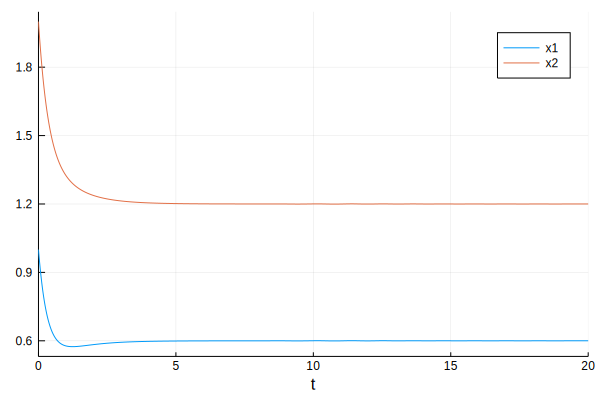

In [8]:
ref_trajectory(t) = [0.6, 1.2] # [sin(t)^2; cos(t)^2];


sys_cl_ref(x, p, t) = Acl * x + B*W*ref_trajectory(t); # Closed-loop dynamical system with reference trajectory
x1 = [1.0 , 2.0]; # Initial values
tspan = (0.0, 20.0); # Time range

prob = ODEProblem(sys_cl_ref, x1, tspan);
sol = solve(prob)

plot(sol, label=["x1" "x2"])